## Quantum Computing
***

From the early 20th century, when atom physics was discovered, nothing could ever defy that until quantum physics was found. Quantum particles can move forward and backward in time, exist simultaneously in two places and even teleport. Quantum computers aim to utilize these strange behaviors to their advantage. Richard Feyman, 1965 Nobel Laureate in Physics and one of the fathers of quantum computing in the 1980s, famously said, "I think I can safely say that nobody understands quantum mechanics”.

IBM unveiled the Q System, the world's first quantum computer, in 2019 and explained to newcomers that a quantum computer is capable of solving (much more quickly) a set of much more complex calculations than traditional computers. As a unit of value, "qubits" are expected to outpace the traditional bits of classical computing.  In the following article, Juan José García Ripoll, researcher at the Institute of Fundamental Physics within the Spanish National Research Council, provides further insight. "In classical computing we know how to solve problems thanks to computer language (AND, OR NOT) used when programming. Operations that are not feasible in bit computing can be performed with a quantum computer. In a quantum computer all the numbers and possibilities that can be created with N qubits are superimposed (if there are 3 qubits, there will be 8 simultaneous possible permutations.) With 1,000 qubits the exponential possibilities far exceed those that we have in classical computing”.

In contrast to classical computing, there are no quantum computing languages at this time. Researchers work to develop algorithms (mathematics models that classical computers also use) that provide concrete solutions to the problems that are presented. "They work differently. A quantum computer isn't suitable for performing day-to-day tasks", Garcia Ripoll explains. "They don't have memory or a processor. We only have a group of qubits that we use to write information, and we work with those. There isn't an architecture as complicated as the architecture for a conventional computer. Today, quantum machines are primitive systems akin to a calculator at the turn of the last century, but their computing power for very specific problems is much greater than a traditional computer's. There is a dichotomy between what appears very simple and what it does, which is very powerful,” García Ripoll points out.

#### These are some Key different between Quantum and Classic computers

 - The quantum computer processes information differently from classical computers. Instead of relying on transistors, which can only represent either the "1" or the "0" of binary information at a time, quantum computers use qubits, which can represent both the "0" and the "1"

 - A quantum computer’s power grows exponentially in relation to the number of qubits linked together. This differs from a conventional computer, which sees its power increase in direct proportion to the number of transistors. It is for this reason that quantum computers could eventually provide much better performance than classical ones.

 - Despite the fact that quantum computers could drastically outperform classical computers at some tasks — Optimizing delivery routes or simulating chemical reactions, for example — The problem with them is that they are difficult to build and are not expected to offer many advantages in many types of calculations. So even when powerful quantum computers start to appear, most everyday tasks are likely to be handled better by conventional computers.

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://research-assets.cbinsights.com/2020/12/22124918/Quantum_computing_classical_qubit_infographic_122020.png", height = 700, width = 700)

***
## The Deutsch-Jozsa algorithm

<a href="https://akyrillidis.github.io/notes/quant_post_8">Literature reference</a>

The Deutsch-Jozsa algorithm demonstrates the significance of allowing quantum amplitudes to take both positive and negative values, as opposed to classical probabilities that are always non-negative. Proposed by David Deutsch and Richard Jozsa in 1992, the Deutsch-Jozsa Algorithm was one of the first quantum algorithms that showed that quantum computation could demonstrate an exponential speed-up over a deterministic classical algorithm. The Deutsch-Jozsa Algorithm was the inspiration for Simon’s and Shor’s Algorithm

### The problem setting

Let us consider the following problem: There is a univariate function $f$ , defined over the binary alphabet $0,1$, with output range in the same alphabet $0,1$. I.e., $f:0,1⟶0,1$. 
With a bit of inspection, and making no assumptions about $f$, there are four possible configurations for the function $f$:

With a bit of inspection, and making no assumptions about $f$, there are four possible configurations for the function $f$:

 - Both inputs $0,1$ are mapped to the output $0:f(0)=f(1)=0$.

 - Both inputs $0,1$ are mapped to the output $1:f(0)=f(1)=1$.

 - Inputs pass through $f$ unchanged: $f(0)=0$ and $f(1)=1$.

 - Inputs are exchanged after passing through $f:f(0)=1$ and $f(1)=0$.

We will call the first two cases as $f$ being “constant” (i.e., whatever input we insert, the function behaves the same way), and the last two cases as $f$ being balanced.

The question is the following: Given a function $f:0,1⟶0,1$ and without knowing anything more than that, determine whether $f$ is a constant or a balanced function with the minimum number of function evaluations.

#### Quantum Solution

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png", height = 500, width = 700)

### What a classic algorithm would do?

In the classical sense, an algorithm that solves this problem would implement an if-then-else statement:

as you can see, we require two function evaluations to figure out the answer. In the next sections, we will see how we exploit superposition of states in quantum machines to solve the problem more efficiently.

***
## Qiskit


In [2]:
import qiskit

In [3]:
import qiskit.providers.aer as aer

In [4]:
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

### Preliminaries
***

$|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$|\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

$|\alpha = a + bi \qquad \beta = c + di \qquad a,b,c,d \in \mathbb{R}$

$ \alpha^2 + \beta^2 = 1$

<br>

### Gates

***

$ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & .\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix}  \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = |+\rangle $

$ H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix}  \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = |-\rangle  $

$H^* = H^{-1}$

$(a+bi)^* = a - bi$

$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $

<br>

### Measurement
***

$ |\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \Leftrightarrow  \langle \psi | = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}$

#### Probability of measuring $|0\rangle$ when in $|+\rangle$

 $|\langle 0 | + \rangle |^2 = |\langle 0 || + \rangle |^2= | \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} |^2 = (1)(\frac{1}{\sqrt{2}}) + (0)(\frac{1}{\sqrt{2}})|^2 = (\frac{1}{\sqrt{2}})^2$
 
 $|a+bi| = \sqrt{(a+bi)(a-bi)} = \sqrt{a^2+b^2}$

<br>

### Constant Zero Function

***

In [8]:
circuit = qiskit.QuantumCircuit(2,1)

In [9]:
circuit.initialize([1,0],0)

In [10]:
circuit.initialize([0,1],1)

In [11]:
circuit.h(0)

In [12]:
circuit.h(1)

In [13]:
circuit.i(1)

In [14]:
circuit.h(0)

In [15]:
circuit.measure(0,0)

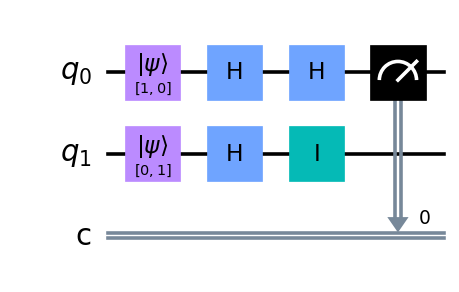

In [16]:
circuit.draw(output='mpl', scale=1.8)

***
## END